In [1]:
import symfit
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, Parameter, Variable, variables, Fit, ODEModel, D

In [7]:
# In this block, four models are individually defined. This is bad code: lots is repeated! But each is perhaps a clearer 
# of the use of symfit

# MODEL ONE this model comprises A+B--->AB (ie a simple chemical reaction)
def oneProductModel(kABval=1e-2,conc0=50e-2,tvec=np.linspace(0, 200000, 100)):
    # Here we describe a model with A+B->AB
    A, B, AB, t = variables('A, B, AB, t')
    tdata = [0,1,2]

    kAB = Parameter('kAB',kABval)  # Rate constant for formation of AB

    # here's a list of rate expressions for each component in the mixture
    model_dict = {
        D(AB,t): kAB * A * B,
        D(A,t): -kAB*A*B,
        D(B,t): -(kAB*A*B),
    }
    # here we define the ODE model and specify the start concentrations of each reagent

    ode_model = ODEModel(model_dict, initial={t: 0.0, A:conc0, B:conc0, AB:0, })

    # and then we fit the ODE model
    fit = Fit(ode_model, t=tdata, A=None, B=None, AB=None)
    fit_result = fit.execute()


    # Generate some data
    tvec = np.linspace(0, 100, 100)
    ans = ode_model(t=tvec, **fit_result.params)._asdict()
    
    # and plot it
    plt.plot(tvec, ans[AB], label='[AB]')


    #plt.plot(tvec, BCres, label='[BC]')
    #plt.scatter(tdata, adata)
    plt.legend()
    plt.show()

# MODEL TWO this model comprises A+B--->AB  and B+C---->BC
def twoProductModel(kABval=1e-2,kBCval=1e-2,conc0=50e-3,tvec=np.linspace(0, 200000, 100)):
    # conc0 is initial concentration
    tdata = [0,1,2]
    # Here we describe a model with A+B->AB and B+C->BC
    A, B, C, AB, BC, t = variables('A, B, C, AB, BC, t')
    kAB = Parameter('kAB',kABval)  # Rate constant for formation of AB
    kBC = Parameter('kBC',kBCval)    # rate constant for formation of BC
    
    # here's a list of rate expressions for each component in the mixture
    model_dict = {
        D(AB,t): kAB * A * B,
        D(BC,t): kBC * B * C,
        D(A,t): -kAB*A*B,
        D(B,t): -(kAB*A*B + kBC*B*C),
        D(C,t): -kBC*B*C,
    }
    
    # here we define the ODE model and specify the start concentrations of each reagent

    ode_model = ODEModel(model_dict, initial={t: 0.0, A:conc0, B:conc0, C:conc0, AB:0, BC:0})

    # and then we fit the ODE model
    fit = Fit(ode_model, t=tdata, A=None, B=None, AB=None, BC=None, C=None)
    fit_result = fit.execute()
    
    # Generate some data
    tvec = np.linspace(0, 100, 100)
    ans = ode_model(t=tvec, **fit_result.params)._asdict()
    
    # and plot it
    plt.plot(tvec, ans[AB], label='[AB]')
    plt.plot(tvec, ans[BC], label='[BC]')
    #plt.scatter(tdata, adata)
    plt.legend()
    plt.show()
    
    res = [ans[AB][-1],ans[BC][-1]]
    resNorm = res/sum(res)
    plt.bar([1,2],100*resNorm)
    plt.xticks([1,2],('[AB]','[BC]'))
    plt.ylabel('%age at eq')
    plt.show()

    # enhancement, in percent, compared to equal concentrations everywhere
    resEnh = 100*((np.array(resNorm)) - 1/len(resNorm))/(1/len(resNorm))
    # rounding errors can give a spurious difference: set small values to zero
    resEnh[abs(resEnh) < 1e-5] = 0
    if (sum(abs(resEnh)) > 0):
        plt.bar([1,2],resEnh)
        plt.xticks([1,2],('[AB]','[BC]'))
        plt.ylabel('%age at eq')
        plt.title('Enhancement / %')
        plt.show()
    else:
        print("No enhancement compared to equal rates")
    
    return ans



# MODEL 3: this is a box where each vertex is connected to two others.
def box(kABval=1e-2,kACval=1e-2,kBDval=1e-2,kCDval=1e-2,kBCval=1e-2,kADval=1e-2,conc0=50e-3,tvec=np.linspace(0, 200000, 100)):
    # Here we describe a model with A+B->AB
    A, B, C, Di, AB, AC, CD, BD,  t = variables('A, B, C, Di, AB, AC, CD, BD,  t')
    tdata = [0,1,2,100,1000,10000]

    kAB = Parameter('kAB',kABval)  # Rate constant for formation of AB
    kAC = Parameter('kAC',kACval)  # Rate constant for formation of AC
    kBD = Parameter('kBD',kBDval)  # Rate constant for formation of BD
    kCD = Parameter('kCD',kCDval)  # Rate constant for formation of CD



    # here's a list of rate expressions for each component in the mixture
    # here I'm calling the concentration of D as'Di' to avoid confusion
    model_dict = {
        D(AB,t): kAB * A * B,
        D(AC,t): kAC * A * C,
        D(BD,t): kBD * B * Di,
        D(CD,t): kCD * C * Di,
        D(A,t): -(kAB*A*B + kAC*A*C),
        D(B,t): -(kAB*A*B + kBD*B*Di),
        D(C,t): -(kAC*A*C+kCD*C*Di),
        D(Di,t): -(kBD*B*Di+kCD*C*Di),
    }
    # here we define the ODE model and specify the start concentrations of each reagent

    ode_model = ODEModel(model_dict, initial={t: 0.0, A:conc0, B:conc0, C:conc0, Di:conc0, AB:0,  AC:0, BD:0, CD:0,  })

    # and then we fit the ODE model
    fit = Fit(ode_model, t=tdata, A=None, B=None, C=None, Di=None, AB=None,  AC=None, BD=None, CD=None, )
    fit_result = fit.execute()


    # Generate some data
    ans = ode_model(t=tvec, **fit_result.params)._asdict()

    
    # and plot it
    plt.plot(tvec, ans[AB], label='[AB]')
    plt.plot(tvec, ans[AC], label='[AC]')
    plt.plot(tvec, ans[CD], label='[CD]')
    plt.plot(tvec, ans[BD], label='[BD]')


    #plt.plot(tvec, BCres, label='[BC]')
    #plt.scatter(tdata, adata)
    plt.legend()
    plt.show()

    res = [ans[AB][-1],ans[AC][-1],ans[CD][-1],ans[BD][-1]]
    resNorm = res/sum(res)
    plt.bar([1,2,3,4],100*resNorm)
    plt.xticks([1,2,3,4],('[AB]','[AC]','[CD]','[BD]'))
    plt.ylabel('%age at eq')
    plt.show()

    # enhancement, in percent, compared to equal concentrations everywhere
    resEnh = 100*((np.array(resNorm)) - 1/len(resNorm))/(1/len(resNorm))
    
    # rounding errors can give a spurious difference: set small values to zero
    resEnh[abs(resEnh) < 1e-5] = 0
    if (sum(abs(resEnh)) > 0):
        yval = [1,2,3,4]
        plt.bar(yval,resEnh)
        plt.xticks(yval,('[AB]','[AC]','[CD]','[BD]'))
        plt.ylabel('%age at eq')
        plt.title('Enhancement / %')
        plt.show()
    else:
        print("No enhancement compared to equal rates")


# MODEL 4: this is a square where each vertex is connected to three others (i.e. it's fully connected)
def square(kABval=1e-2,kACval=1e-2,kBDval=1e-2,kCDval=1e-2,kBCval=1e-2,kADval=1e-2,conc0=50e-3,tvec=np.linspace(0, 200000, 100)):
    # Here we describe a model with A+B->AB
    A, B, C, Di, AB, AC, CD, BD, AD, BC, t = variables('A, B, C, Di, AB, AC, CD, BD, AD, BC, t')
    tdata = [0,1,2,100,1000,10000]

    kAB = Parameter('kAB',kABval)  # Rate constant for formation of AB
    kAC = Parameter('kAC',kACval)  # Rate constant for formation of AC
    kBD = Parameter('kBD',kBDval)  # Rate constant for formation of BD
    kCD = Parameter('kCD',kCDval)  # Rate constant for formation of CD
    kBC = Parameter('kBC',kBCval)  # Rate constant for formation of BC  ## cross-connection
    kAD = Parameter('kAD',kADval)  # Rate constant for formation of AD  ## cross-connection


    # here's a list of rate expressions for each component in the mixture
    # here I'm calling the concentration of D as'Di' to avoid confusion
    model_dict = {
        D(AB,t): kAB * A * B,
        D(AC,t): kAC * A * C,
        D(BD,t): kBD * B * Di,
        D(CD,t): kCD * C * Di,
        D(BC,t): kBC * B * C,
        D(AD,t): kAD * A * Di,
        D(A,t): -(kAB*A*B + kAC*A*C + kAD*A*Di),
        D(B,t): -(kAB*A*B + kBD*B*Di + kBC*B*C),
        D(C,t): -(kAC*A*C+kCD*C*Di+kBC*B*C),
        D(Di,t): -(kBD*B*Di+kCD*C*Di+kAD*A*Di),
    }
    # here we define the ODE model and specify the start concentrations of each reagent

    ode_model = ODEModel(model_dict, initial={t: 0.0, A:conc0, B:conc0, C:conc0, Di:conc0, AB:0, BC:0, AC:0, BD:0, CD:0, AD:0 })

    # and then we fit the ODE model
    fit = Fit(ode_model, t=tdata, A=None, B=None, C=None, Di=None, AB=None, BC=None, AC=None, BD=None, CD=None, AD=None)
    fit_result = fit.execute()


    # Generate some data
    ans = ode_model(t=tvec, **fit_result.params)._asdict()

    
    # and plot it
    plt.plot(tvec, ans[AB], label='[AB]')
    plt.plot(tvec, ans[AC], label='[AC]')
    plt.plot(tvec, ans[CD], label='[CD]')
    plt.plot(tvec, ans[BC], label='[BC]')
    plt.plot(tvec, ans[BD], label='[BD]')
    plt.plot(tvec, ans[AD], label='[AD]')

    #plt.plot(tvec, BCres, label='[BC]')
    #plt.scatter(tdata, adata)
    plt.legend()
    plt.show()

    res = [ans[AB][-1],ans[AC][-1],ans[CD][-1],ans[BC][-1],ans[BD][-1],ans[AD][-1]]
    resNorm = res/sum(res)
    plt.bar([1,2,3,4,5,6],100*resNorm)
    plt.xticks([1,2,3,4,5,6],('[AB]','[AC]','[CD]','[BC]','[BD]','[AD]'))
    plt.ylabel('%age at eq')
    plt.show()

    # enhancement, in percent, compared to equal concentrations everywhere
    resEnh = 100*((np.array(resNorm)) - 1/len(resNorm))/(1/len(resNorm))
    
    # rounding errors can give a spurious difference: set small values to zero
    resEnh[abs(resEnh) < 1e-5] = 0
    if (sum(abs(resEnh)) > 0):
        yval = [1,2,3,4,5,6]
        plt.bar(yval,resEnh)
        plt.xticks(yval,('[AB]','[AC]','[CD]','[BC]','[BD]','[AD]'))
        plt.ylabel('%age at eq')
        plt.title('Enhancement / %')
        plt.show()
    else:
        print("No enhancement compared to equal rates")

In [4]:
# GENERAL MODEL this general model takes a 2D weighted adjacency matrix, where the weights are rate constants.

def generalModel(rates,conc0,tvec=np.linspace(0, 200000, 100)):


    # make a list of parameters
    numEl = np.shape(rates)[0]

    model_dict = {}
    pp  = ()
    vv = ()


    # first create variables for initial species
    for ii in np.arange(0,numEl):
        var = Variable(chr(ii+65))
        vv = vv + (var,)

    t = Variable('t')

    kdict = {}

    # then create variables for products and rate constants (parameters)
    ik = 0
    for ii in np.arange(0,numEl):
        for ij in np.arange(0,numEl):
            if ii < ij:
                vtxt = vtxt + ','+chr(ii+65)+chr(ij+65)
                var = Variable(chr(ii+65)+chr(ij+65))
                vv = vv + (var,)
                par = Parameter('k'+chr(ii+65)+chr(ij+65),rates[ii,ij])
                pp = pp+(par,)
                # a dict so we can easily find rate constant indices later (this is hacky but if it works...)
                kdict[str(ii)+str(ij)] = ik
                kdict[str(ij)+str(ii)] = ik
                ik = ik+1

    # now create model
    ik=0
    for ii in np.arange(0,numEl):
        # this will be an expression for what's happening to the SM concentration. It's easiest if we just add each
        # relevant product forming reaction to this expression, then take its negative later on
        smexpr = 0
        for ij in np.arange(0,numEl):
            if ii<ij:
                model_dict[D(vv[numEl+ik],t)]= pp[kdict[str(ii)+str(ij)]]*vv[ii]*vv[ij]
                smexpr = smexpr + pp[kdict[str(ii)+str(ij)]]*vv[ii]*vv[ij]
                ik = ik+1
            elif ii>ij:
                # need to have this otherwise we miss a lot of contributions for B/C/D
                smexpr = smexpr + pp[kdict[str(ij)+str(ii)]]*vv[ij]*vv[ii]

        # we're still in the loop here, at the level of starting materials. This part creates d[A]/dt (etc for B, C, D)
        model_dict[D(vv[ii],t)] = -(smexpr)

    # set initial parameters: at time 0, all concentrations of products are zero and concentration of SMs is fixed 
    # (this could be changed to allow variable concs TODO)
    # while we're here, also set the arguments for the fit command later on to zero.
    initial = {t:0.0,}
    fitargs = {}
    for el in vv:
        if len(el.name) == 1:
            initial[el] = conc0
        else:
            initial[el] = 0
        fitargs[el.name] = None

    # define the model
    ode_model = ODEModel(model_dict, initial=initial)
    # honestly I don't know what this does but it seems to have no effect on results (based on my incomplete testing!)
    # it just needs to be there and not 'None'
    tdata = [0,1,2]

    # and then we fit the ODE model
    fit = Fit(ode_model,**fitargs,t=tdata)
    fit_result = fit.execute()


    # Generate some data from our fit model
    ans = ode_model(t=tvec, **fit_result.params)._asdict()

    # and plot it
    result = []
    legtxt = ()
    for ii in np.arange(numEl,len(vv),1):
        plt.plot(tvec, ans[vv[ii]], label=vv[ii].name)
        result.append(ans[vv[ii]][-1])
        legtxt = legtxt + (vv[ii].name,)
    plt.legend()
    plt.show()

    resNorm = result/sum(result)
    xpos = np.arange(1,len(resNorm)+1,1)
    plt.bar(xpos,100*resNorm)
    plt.xticks(xpos,legtxt)
    plt.ylabel('%age at eq')
    plt.show()


    # enhancement, in percent, compared to equal concentrations everywhere
    resEnh = 100*((np.array(resNorm)) - 1/len(resNorm))/(1/len(resNorm))

    # rounding errors can give a spurious difference: set small values to zero
    resEnh[abs(resEnh) < 1e-5] = 0
    if (sum(abs(resEnh)) > 0):
        plt.bar(xpos,resEnh)
        plt.xticks(xpos,legtxt)
        plt.ylabel('%age at eq')
        plt.title('Enhancement / %')
        plt.show()
    else:
        print("No enhancement compared to equal rates in a fully-connected network")

In [8]:
# Edit this cell do to experiments. Examples given.

conc0 = 50e-3 # conc = 50 mM
tvec = np.linspace(0, 200000, 100) # times from 0 s to 2e5 sec, with 100 intervals/timepoints. 
                                # We go all the way to 2e5 sec to ensure we're at equilibrium!
# all default rates are 1e-2 M-1 s-1. To change a rate, just change the argument below

#aa=square(kABval=1e-1,tvec=tvec)
#aa = twoProductModel(kABval=5e-2,tvec=tvec)
#aa = oneProductModel(kABval=100,tvec=tvec)


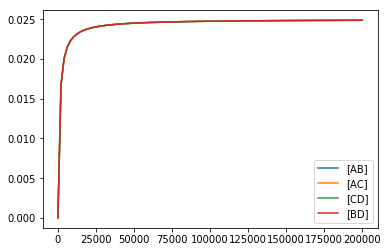

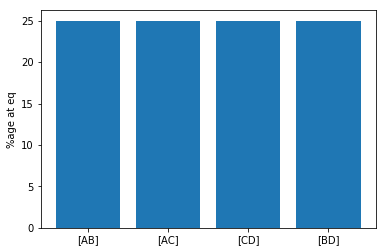

No enhancement compared to equal rates


In [28]:
aa=box(kBCval=0, kADval=0,tvec=tvec)

In [ ]:
square(kABval=0.1)

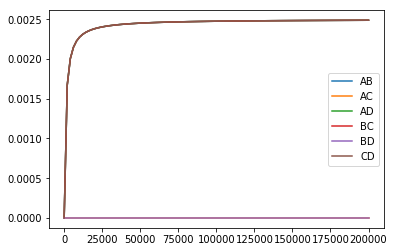

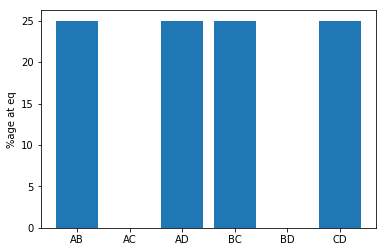

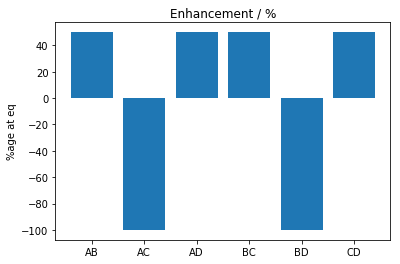

In [6]:
rates = np.array([[ 0,    1e-1, 0,    1e-1 ],
                  [ 1e-1, 0,    1e-1, 0    ],
                  [ 0,    1e-1, 0,    1e-1 ],
                  [ 1e-1, 0,    1e-1, 0    ]])

initconc = 50e-4
tvec=np.linspace(0, 200000, 100)
generalModel(rates, initconc, tvec)